<a href="https://colab.research.google.com/github/RSK11547210/saikrishna_INFO5502_spring2022/blob/main/lab_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (02/24/2022, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (15 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1) Start by choosing a question you'd like a visualization to answer.

(2) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [ ]:
# Your answer here (question + explanation):


 #from the above data i want to display the  number of people with less than 30 years of age in 1900




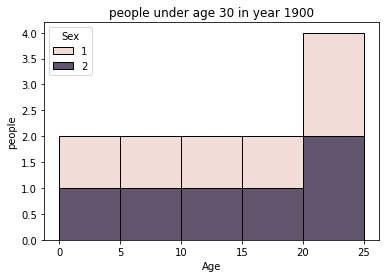

,Sex,Year,Age,People
0,1,1900,0,4619544
2,1,1900,5,4465783
4,1,1900,10,4057669
6,1,1900,15,3774846
8,1,1900,20,3694038
10,1,1900,25,3389280
38,2,1900,0,4589196
40,2,1900,5,4390483
42,2,1900,10,4001749
44,2,1900,15,3801743


In [23]:
# Your answer here (python code + explanation):


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

census_data=pd.read_csv('/content/sample_data/lab_assignment_05_census.csv')

people_1900 = census_data[census_data['Year'] == 1900 ]

under30_1900=people_1900[people_1900['Age']  < 30 ]

axs=sns.histplot(
    under30_1900, x='Age', hue='Sex', multiple='stack'
   )

axs.set_title('people under age 30 in year 1900')
axs.set_ylabel('people')
axs.set_xlabel('Age')
plt.show()

under30_1900

In [ ]:
# Your answer here (interpretation of the results):

'''
from the above visualization, we can come to an conclusion that we have 12



'''

Question 2 (20 points). In this question, you are required to use visualizations to tell a story about a dataset.

Step 1. Pick a domain and data set that you are interested in.

Peruse the provided data sets: http://nixdell.com/classes/HCI-and-Design-Spring-2016/Resources.html.

Choose the one of greatest interest to you. If you would like to explore a different data set, you are free to do so but be aware of how much work might be needed to clean the data and get it into a usable format.

Step 2. Explore the data. Find a story. Ask questions.

Start by asking questions. For example: Is there a relationship between melting point and atomic number? Are the brightness and color of stars correlated? Are there different patterns of nucleotides in different regions in human DNA?

Step 3. Assess the fitness of the data for answering your question.

Inspect the data -- it is invariably helpful to first look at the raw values. Does the data seem appropriate for answering your question? If not, you may need to start the process over. If so, does the data need to be reformatted or cleaned prior to analysis? Perform any steps necessary to get the data into shape prior to visual analysis.

Step 4. Create the visualization(s) that tell a story about the data.

You will likely need to create several and see what works best. Keep a record of things you tried and discarded.


In [ ]:
# Your answer here (python code + explanation):








Question 3 (15 points). In this question, you are required to create visualization for time series data. 

We have collected all the articles from AMIA in the last 30 years. The dataset is avaliable on GitHub: https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv. 

Please use the tool Yake: https://github.com/LIAAD/yake to extract the top N (you can set different N value to get the best visualization results) keywords from the article titles (all the articles), then visualize how the keywords changed over years in one figure. (Split the data by every five years)

In [22]:
# Your python code here:

!pip install  git+https://github.com/LIAAD/yake

from numpy.ma.core import maximum
import pandas as pd
import yake
import matplotlib.pylab as plt

data=pd.read_csv('/content/sample_data/lab_assignment_05_amia_cleaned.csv')


sort_df=data.sort_values(['year'],ascending=True)

sort_df=sort_df[(sort_df['year']).notna()]


keywords=yake.KeywordExtractor(top=5,features=None)

result=pd.DataFrame(data=None, columns=["Keyword","Score","year"])

maximum_year=int(sort_df['year'].max())

minimum_year=int(sort_df['year'].min())


while minimum_year <= maximum_year:
  clean_df=sort_df[sort_df['year'].isin(minimum_year, minimum_year+1)]
  txt=''.join(clean_df['title'])
  new_keywords=keywords.extract_keywords(txt)
  result.update({minimum_year:new_keywords})
  df=pd.DataFrame(data=new_keywords,columns=["Keyword","Score"])
  df["year"]=minimum_year
  result=pd.concat([result,df],ignore_index = True)
  minimum_year=minimum_year + 5

fig,axs=plt.subplots(figsize=(15,10))
for key,group in result.groupby(['Keyword']):
  axs.plot(grp['year'],grp['score'],label=key,marker='+')


axs.legend()
plt.title('top search data by year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()


  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-8unjasc_
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-8unjasc_


TypeError: ignored